In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter (action = 'ignore')

In [ ]:
df = pd.read_csv("mydata.csv")  # veriyi df DataFrame'ine kaydeder

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,28297.000000,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,2.829700e+04,28296.000000,28296.0
mean,6.508252,1.357405e+05,7.667026e+05,7.823551e+05,8.483811e+05,1.191306e+06,0.002969,0.0
std,2.291090,3.013167e+05,2.126123e+06,2.166615e+06,2.513869e+06,3.106440e+06,0.054405,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,6.000000,5.966520e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,1.950669e+04,1.963654e+04,3.682140e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.601022e+05,1.386575e+05,1.407606e+05,3.654323e+05,6.670935e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.495524e+07,2.878359e+07,1.000000,0.0


In [ ]:
df.nunique()


,0
step,8
type,5
amount,28182
nameOrig,28297
oldbalanceOrg,18645
newbalanceOrig,14860
nameDest,17076
oldbalanceDest,13181
newbalanceDest,3668
isFraud,2


In [ ]:
df['nameDest'].unique()[:5] # 5 unique değeri görüntüleyerek veri örneklerini inceliyorum.

array(['M1979787155', 'M2044282225', 'C553264065', 'C38997010',
       'M1230701703'], dtype=object)

In [ ]:
df['nameOrig'].unique()[:5] # 5 unique değeri görüntüleyerek veri örneklerini inceliyorum.

array(['C1231006815', 'C1666544295', 'C1305486145', 'C840083671',
       'C2048537720'], dtype=object)

In [ ]:
df['nameDest_numeric'] = df['nameDest'].apply(lambda x: hash(x) % 10**8) # hashing ile alfanümerik değerlerin hash'lenmiş karşılıklarını üreterek kategorik verileri numeric değerlere convert ediyorum.
df = df.drop('nameDest', axis=1)

# nameOrig sütunu için hashing ve drop işlemi
df['nameOrig_numeric'] = df['nameOrig'].apply(lambda x: hash(x) % 10**8)
df = df.drop('nameOrig', axis=1)


In [ ]:
df = pd.get_dummies(df, columns=['type'], prefix='type') #one-hot encoding ile type column'ı numeric değere dönüştürülüyor.

In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_numeric,nameOrig_numeric,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,28910655,32100750,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,56426938,89721598,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,462326,39024843,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,64261655,77193514,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,47140217,8007794,False,False,False,True,False


In [ ]:
df.info() #Böylelikle tüm column'lar numeric değere dönüştürüldü.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   step              28297 non-null  int64  
 1   amount            28297 non-null  float64
 2   oldbalanceOrg     28297 non-null  float64
 3   newbalanceOrig    28297 non-null  float64
 4   oldbalanceDest    28297 non-null  float64
 5   newbalanceDest    28297 non-null  float64
 6   isFraud           28296 non-null  float64
 7   isFlaggedFraud    28296 non-null  float64
 8   nameDest_numeric  28297 non-null  int64  
 9   nameOrig_numeric  28297 non-null  int64  
 10  type_CASH_IN      28297 non-null  bool   
 11  type_CASH_OUT     28297 non-null  bool   
 12  type_DEBIT        28297 non-null  bool   
 13  type_PAYMENT      28297 non-null  bool   
 14  type_TRANSFER     28297 non-null  bool   
dtypes: bool(5), float64(7), int64(3)
memory usage: 2.3 MB


 **Null (None/NaT):** Tanımsız, var olmayan veya atanmamış bir değer. Veri türü NoneType veya NaT olabilir. Her tür veri tipi için kullanılabilir (sayısal, metin, tarih vb.).

 **NaN (Not a Number):** Özellikle sayısal verilerde bir değerin "geçersiz" olduğunu gösterir. Sayısal işlemlerle ilişkili olup, veri türü float olur.

In [ ]:
# DataFrame'deki null (NaN) değerlerin toplamını kontrol et
df.isnull().sum()


,0
step,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0
nameDest_numeric,0
nameOrig_numeric,0


In [ ]:
# DataFrame'de null değer olup olmadığını kontrol et (True ya da False)
df.isnull().values.any()


True

In [ ]:
# Null veya NaN olan tüm satırları gösterir
df[df.isnull().any(axis=1)]


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_numeric,nameOrig_numeric,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
28296,8,61553.92,0.0,0.0,242151.6,30370.0,NaN,NaN,35463611,86300022,False,True,False,False,False


In [ ]:
df = df.dropna() # Eksik veri içeren satırları sil

In [ ]:
# Soru işareti içeren hücreleri bul
contains_question_mark = df.apply(lambda x: x.str.contains('?').any() if x.dtype == 'object' else False)

# Hangi sütunlarda soru işareti olduğunu göster
print(contains_question_mark[contains_question_mark].index)

# "?" içeren herhangi bir sütun olmadığını gösterir. Yani, veri setindeki metin türündeki sütunlarda soru işareti karakteri bulunmuyor.

Index([], dtype='object')


In [ ]:
df.head(20)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameDest_numeric,nameOrig_numeric,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.00,0.0,0.0,28910655,32100750,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.0,0.00,0.0,0.0,56426938,89721598,False,False,False,True,False
2,1,181.00,181.00,0.00,0.0,0.00,1.0,0.0,462326,39024843,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.0,0.00,1.0,0.0,64261655,77193514,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.0,0.00,0.0,0.0,47140217,8007794,False,False,False,True,False
5,1,7817.71,53860.00,46042.29,0.0,0.00,0.0,0.0,42464727,1567937,False,False,False,True,False
6,1,7107.77,183195.00,176087.23,0.0,0.00,0.0,0.0,3198308,1807041,False,False,False,True,False
7,1,7861.64,176087.23,168225.59,0.0,0.00,0.0,0.0,139367,28186414,False,False,False,True,False
8,1,4024.36,2671.00,0.00,0.0,0.00,0.0,0.0,99806361,43778399,False,False,False,True,False
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,0.0,0.0,73122086,49978112,False,False,True,False,False


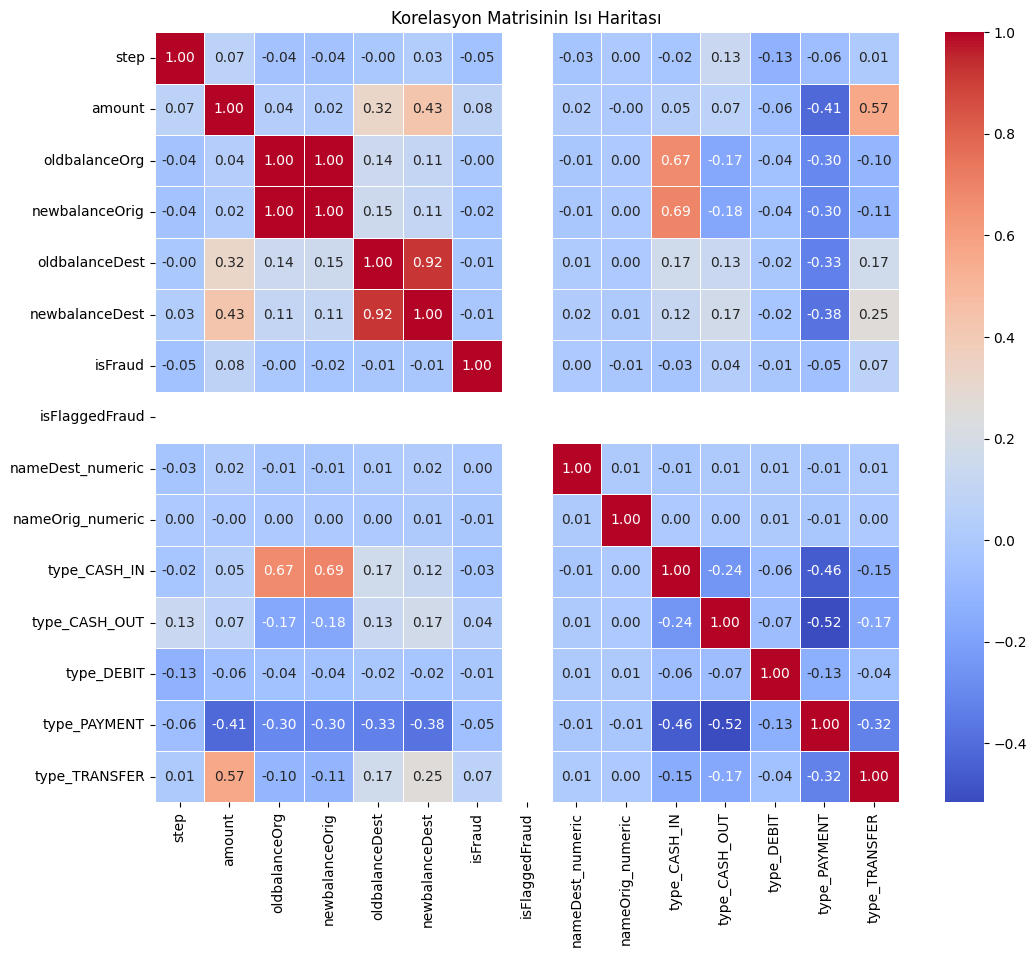

In [ ]:
# Korelasyon matrisini hesapla
correlation_matrix = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
                         'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'nameDest_numeric',
                         'nameOrig_numeric', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
                         'type_PAYMENT', 'type_TRANSFER']].corr()

# Korelasyon matrisini ısı haritası olarak görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisinin Isı Haritası')
plt.show()


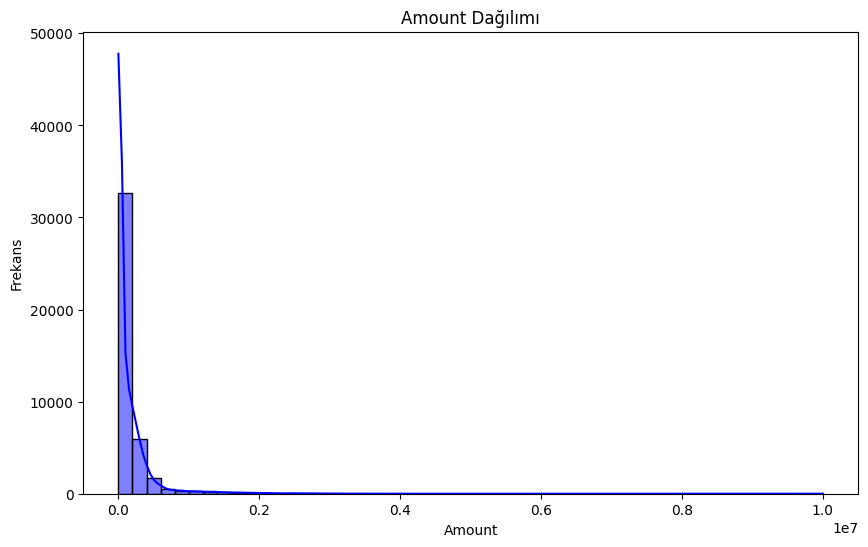

In [ ]:
# Amount dağılımı için histogram
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title('Amount Dağılımı')
plt.xlabel('Amount')
plt.ylabel('Frekans')
plt.show()


Bu çubuk grafikte, farklı işlem türleri için dolandırıcılık oranları
 gösteriliyor. "type_TRANSFER" ve "type_CASH_OUT" işlemlerinde dolandırıcılık oranı diğer işlem türlerine kıyasla daha yüksek görünüyor. Diğer işlem türleri (CASH_IN, DEBIT, PAYMENT) ise düşük dolandırıcılık oranlarına sahip.








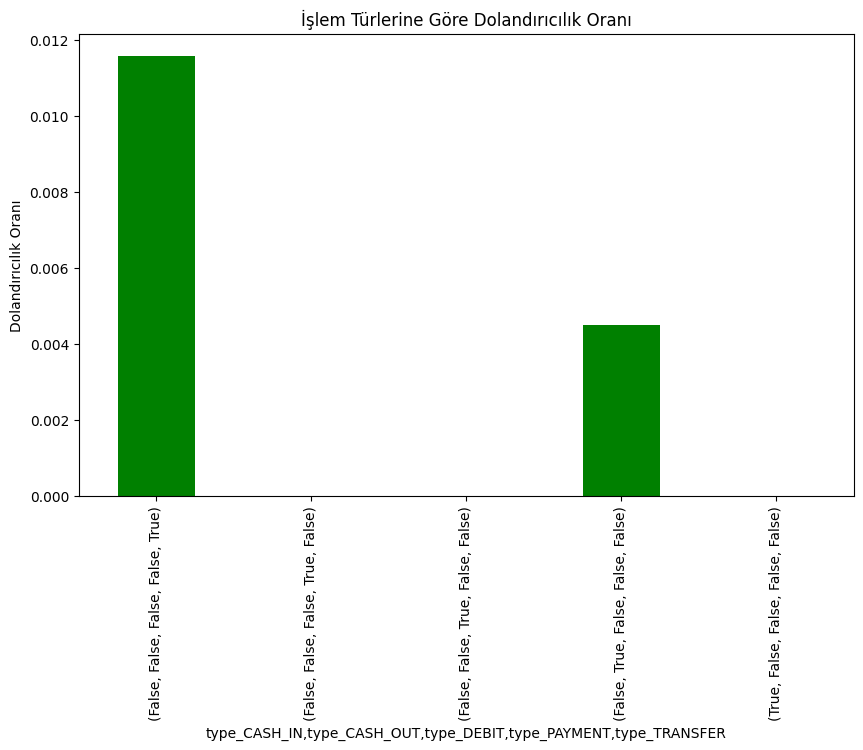

In [ ]:
# İşlem türüne göre dolandırıcılık oranı
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

fraud_by_type = df.groupby(transaction_types)['isFraud'].mean()

fraud_by_type.plot(kind='bar', figsize=(10,6), color='green')
plt.title('İşlem Türlerine Göre Dolandırıcılık Oranı')
plt.ylabel('Dolandırıcılık Oranı')
plt.show()


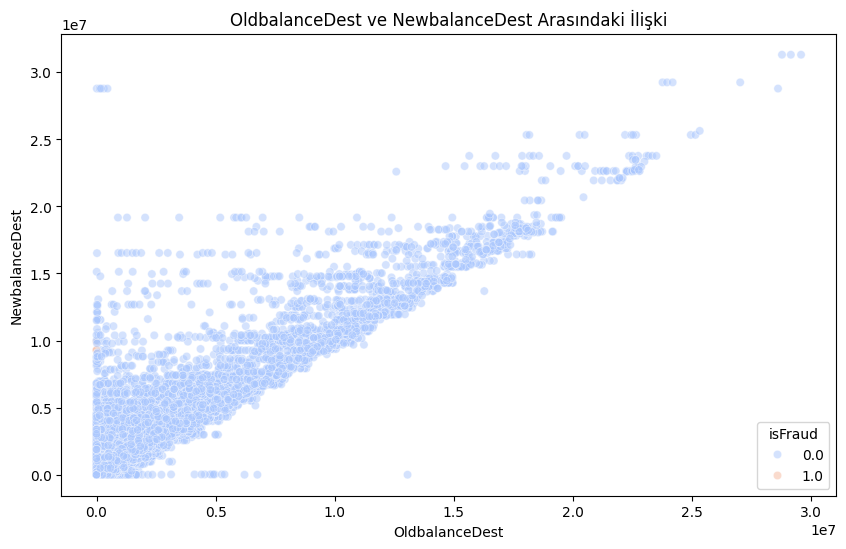

In [ ]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', data=df, hue='isFraud', palette='coolwarm', alpha=0.5)
plt.title('OldbalanceDest ve NewbalanceDest Arasındaki İlişki')
plt.xlabel('OldbalanceDest')
plt.ylabel('NewbalanceDest')
plt.show()


Grafik, sistem tarafından bayraklanan işlemler (isFlaggedFraud) ile gerçek dolandırıcılık işlemleri (isFraud) arasındaki farkı gösteriyor. Bu grafik, bayraklanan işlemler arasında çok az sayıda dolandırıcılık tespit edildiğini ortaya koyuyor.

Çıkarım: Bayraklanan işlemlerin çoğu aslında dolandırıcılık değil. Bu durum, dolandırıcılık tespitinde kullanılan mevcut bayraklama algoritmasının etkinliğini sorgulama ihtiyacı doğurabilir.

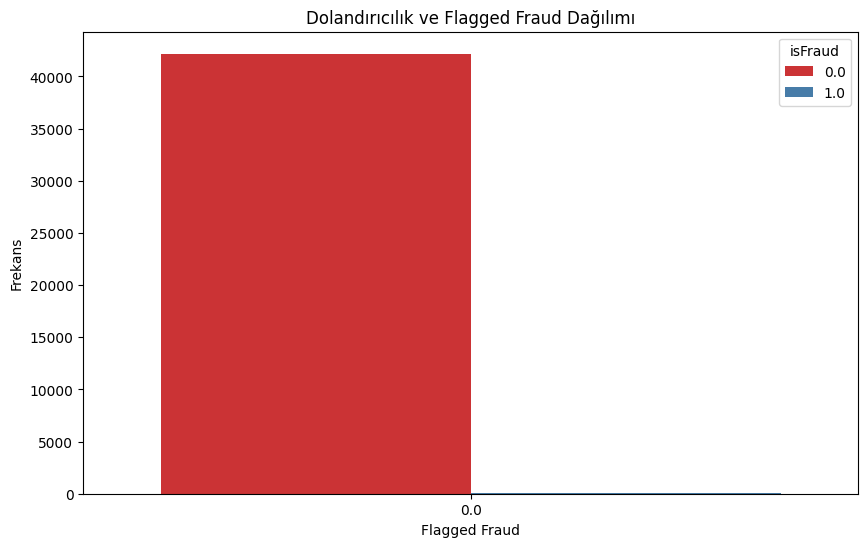

In [ ]:
# Bar plot for isFraud and isFlaggedFraud
plt.figure(figsize=(10,6))
sns.countplot(x='isFlaggedFraud', hue='isFraud', data=df, palette='Set1')
plt.title('Dolandırıcılık ve Flagged Fraud Dağılımı')
plt.xlabel('Flagged Fraud')
plt.ylabel('Frekans')
plt.show()


Bu grafikte, işlem miktarının farklı kategorilerinde dolandırıcılık oranları incelenmiş. Genellikle büyük işlemler, daha küçük işlemlere kıyasla daha yüksek dolandırıcılık oranına sahip.

Çıkarım: Büyük miktarda işlem yapılan işlemler, dolandırıcılık açısından daha riskli olabilir. Özellikle 100k+ kategorisine dikkat edilmeli.

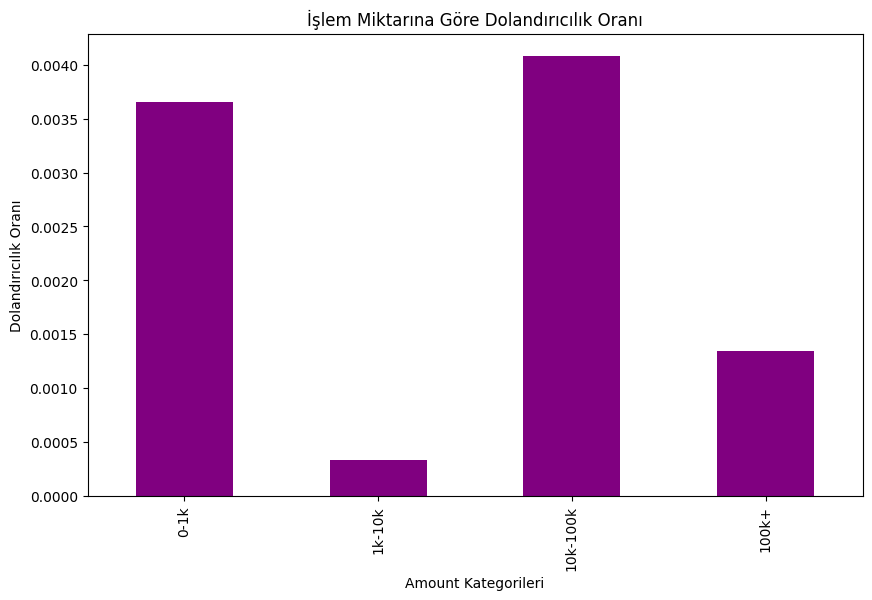

In [ ]:
# İşlem miktarına göre dolandırıcılık oranı (Amount'ı kategorize ederek)
df['amount_category'] = pd.cut(df['amount'], bins=[0, 1000, 10000, 100000, 1000000], labels=['0-1k', '1k-10k', '10k-100k', '100k+'])

fraud_by_amount = df.groupby('amount_category')['isFraud'].mean()

fraud_by_amount.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('İşlem Miktarına Göre Dolandırıcılık Oranı')
plt.ylabel('Dolandırıcılık Oranı')
plt.xlabel('Amount Kategorileri')
plt.show()


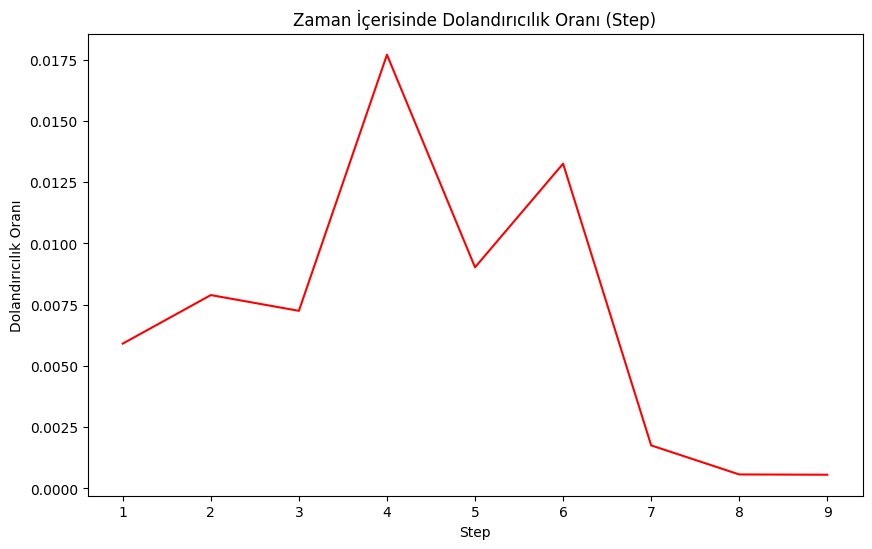

In [ ]:
# Step'e göre dolandırıcılık oranı
fraud_by_step = df.groupby('step')['isFraud'].mean()

plt.figure(figsize=(10,6))
fraud_by_step.plot(kind='line', color='red')
plt.title('Zaman İçerisinde Dolandırıcılık Oranı (Step)')
plt.xlabel('Step')
plt.ylabel('Dolandırıcılık Oranı')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişkeni
X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
          'nameDest_numeric', 'nameOrig_numeric', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
          'type_PAYMENT', 'type_TRANSFER']]
y = df['isFraud']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler kullanarak verilerin normalizasyonu
scaler = MinMaxScaler()

# Eğitim ve test setleri için normalizasyon uygulama
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Modellerin cross-validation ile değerlendirilmesi
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Doğruluk Skoru: {scores.mean():.4f}")

# En iyi modeli seçme (Random Forest örneği)
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)

# Hiperparametre optimizasyonu (Grid Search)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"En İyi Hiperparametreler: {best_params}")

# Optimize edilmiş modelin değerlendirilmesi
y_pred_optimized = grid_search.predict(X_test_scaled)

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")
print("Karışıklık Matrisi:")
print(conf_matrix)

# Classification Report
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_optimized))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression CV Doğruluk Skoru: 0.9971
Decision Tree CV Doğruluk Skoru: 0.9973
KNN CV Doğruluk Skoru: 0.9971
SVM CV Doğruluk Skoru: 0.9971
Random Forest CV Doğruluk Skoru: 0.9983
En İyi Hiperparametreler: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Doğruluk (Accuracy): 0.9984
Kesinlik (Precision): 1.0000
Duyarlılık (Recall): 0.4815
F1 Skoru: 0.6500
Karışıklık Matrisi:
[[8462    0]
 [  14   13]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8462
         1.0       1.00      0.48      0.65        27

    accuracy                           1.00      8489
   macro avg       1.00      0.74      0.82      8489
weighted avg       1.00      1.00      1.00      8489



In [ ]:
# SMOTE ile veri setini dengeleme
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Random Forest modelini yeniden eğitme
best_model.fit(X_train_balanced, y_train_balanced)
y_pred_smote = best_model.predict(X_test_scaled)

# Performans metrikleri (SMOTE sonrası)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

print(f"SMOTE ile Doğruluk (Accuracy): {accuracy_smote:.4f}")
print(f"Kesinlik (Precision): {precision_smote:.4f}")
print(f"Duyarlılık (Recall): {recall_smote:.4f}")
print(f"F1 Skoru: {f1_smote:.4f}")
print("Karışıklık Matrisi:")
print(conf_matrix_smote)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SMOTE ile Doğruluk (Accuracy): 0.9980
Kesinlik (Precision): 0.6923
Duyarlılık (Recall): 0.6667
F1 Skoru: 0.6792
Karışıklık Matrisi:
[[8454    8]
 [   9   18]]


In [ ]:
# En iyi threshold'u bulma ve uygulama
from sklearn.metrics import precision_recall_curve

# Tahmin olasılıklarını al
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Precision-Recall eğrisi
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# En iyi threshold'u bulmak (F1 skoruna göre)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"En İyi Threshold: {best_threshold:.4f}")

# Yeni threshold ile tahmin yapma
y_pred_new_threshold = (y_probs >= best_threshold).astype(int)

# Yeni threshold ile performans değerlendirmesi
new_precision = precision_score(y_test, y_pred_new_threshold)
new_recall = recall_score(y_test, y_pred_new_threshold)
new_f1 = f1_score(y_test, y_pred_new_threshold)

print(f"Yeni Threshold ile Kesinlik (Precision): {new_precision:.4f}")
print(f"Yeni Threshold ile Duyarlılık (Recall): {new_recall:.4f}")
print(f"Yeni Threshold ile F1 Skoru: {new_f1:.4f}")

En İyi Threshold: 0.6600
Yeni Threshold ile Kesinlik (Precision): 0.7826
Yeni Threshold ile Duyarlılık (Recall): 0.6667
Yeni Threshold ile F1 Skoru: 0.7200


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kümeleme algoritmalarının bazıları denetimsiz öğrenme yöntemleri olduğundan, hedef değişkeni (y) kullanmayacağız. Bunun yerine sadece özellikler (X) ile çalışacağız.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np

# 1. K-Ortalama (k-Means) Kümeleme
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_test_scaled)  # Normalleştirilmiş veriler ile fit_predict
print(f'K-Ortalama Kümeleme Etiketleri: {np.unique(kmeans_labels)}')

# 2. Apriori Algoritması (Birliktelik Kuralları)
# Apriori algoritması için normalleştirilmiş veriler yerine orijinal veriler kullanılır
frequent_itemsets = apriori(df[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']], min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(f'Apriori Algoritması Birliktelik Kuralları: {rules.head()}')

# 3. Hiyerarşik Kümeleme (Agglomerative Clustering)
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_test_scaled)  # Normalleştirilmiş veriler ile fit_predict
print(f'Hiyerarşik Kümeleme Etiketleri: {np.unique(hierarchical_labels)}')

# 4. DBSCAN Kümeleme
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_test_scaled)  # Normalleştirilmiş veriler ile fit_predict

# DBSCAN Kümeleme Etiketleri'nde negatif değerler kontrolü
unique_dbscan_labels, dbscan_label_counts = np.unique(dbscan_labels, return_counts=True)
print(f'DBSCAN Kümeleme Etiketleri: {unique_dbscan_labels}')
print(f'DBSCAN Kümeleme Etiket Sayıları: {dbscan_label_counts}')

# Eğer negatif etiket varsa, bunları ayrı bir şekilde ele alabilirsiniz
if -1 in unique_dbscan_labels:
    noise_count = dbscan_label_counts[list(unique_dbscan_labels).index(-1)]
    print(f'DBSCAN Gürültü (Noise) Sayısı: {noise_count}')

# 5. Gaussian Karışım Modelleri (Gaussian Mixture Models - GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_test_scaled)  # Normalleştirilmiş veriler ile fit_predict
print(f'Gaussian Mixture Modelleri Etiketleri: {np.unique(gmm_labels)}')

# Kümeleme algoritmaları sonuçlarını karşılaştırmak
print("\nKümeleme Algoritmaları Karşılaştırması:")
print(f'K-Ortalama Kümeleme Etiketleri: {np.bincount(kmeans_labels)}')
print(f'Hiyerarşik Kümeleme Etiketleri: {np.bincount(hierarchical_labels)}')

# DBSCAN negatif (-1) etiketleriyle başa çıkma
dbscan_clusters_only = dbscan_labels[dbscan_labels != -1]  # Gürültü olmayan etiketler
if len(dbscan_clusters_only) > 0:
    print(f'DBSCAN Kümeleme Etiketleri (Gürültü Hariç): {np.bincount(dbscan_clusters_only)}')
else:
    print('DBSCAN Kümeleme Etiketleri: Gürültü hariç kümelenmiş veri yok.')

print(f'Gaussian Mixture Modelleri Etiketleri: {np.bincount(gmm_labels)}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


K-Ortalama Kümeleme Etiketleri: [0 1]
Apriori Algoritması Birliktelik Kuralları: Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Hiyerarşik Kümeleme Etiketleri: [0 1]
DBSCAN Kümeleme Etiketleri: [-1  0  1  2  3  4  5  6]
DBSCAN Kümeleme Etiket Sayıları: [ 229 4155  757 1821 1357   73   83   14]
DBSCAN Gürültü (Noise) Sayısı: 229
Gaussian Mixture Modelleri Etiketleri: [0 1]

Kümeleme Algoritmaları Karşılaştırması:
K-Ortalama Kümeleme Etiketleri: [4331 4158]
Hiyerarşik Kümeleme Etiketleri: [4169 4320]
DBSCAN Kümeleme Etiketleri (Gürültü Hariç): [4155  757 1821 1357   73   83   14]
Gaussian Mixture Modelleri Etiketleri: [4331 4158]
